<a href="https://colab.research.google.com/github/aiswaryapaul/LSTM/blob/main/LSTM_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

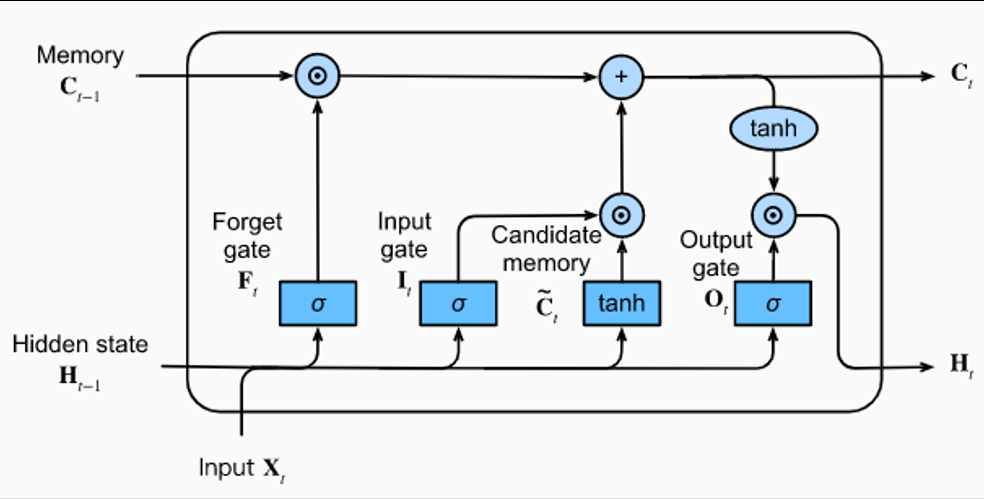

At every time step, the LSTM decides what to forget, what new information to add, and what to output.
· First, the forget gate looks at the previous hidden state and current input, and outputs a number between 0 and 1 for each part of the memory — 0 means ‘forget this’, 1 means ‘keep this’.
· Then the candidate memory is created using a tanh function, which generates a possible new memory. This can have positive or negative values — it’s a suggestion.
· The input gate, using a sigmoid, decides how much of that new memory to actually add.
· Both of these get combined to update the cell state — this is our long-term memory.
· Finally, the output gate uses a sigmoid to decide what part of the current memory to show to the outside.
· The updated memory passes through a tanh, and is multiplied with the output gate to form the final output, which is also the new hidden state.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,LSTM,Dense


In [ ]:
with open("/content/2024_state_of_the_union.txt","r",encoding ='utf-8') as myfile:
  mytext = myfile.read()

In [ ]:
mytext

'March 07, 2024\nRemarks of President Joe Biden — State of the Union Address As Prepared for Delivery\nHome\nBriefing Room\nSpeeches and Remarks\nThe United States Capitol\n\n###\n\nGood evening. \n\nMr. Speaker. Madam Vice President. Members of Congress. My Fellow Americans. \n\nIn January 1941, President Franklin Roosevelt came to this chamber to speak to the nation. \n\nHe said, “I address you at a moment unprecedented in the history of the Union.” \n\nHitler was on the march. War was raging in Europe. \n\nPresident Roosevelt’s purpose was to wake up the Congress and alert the American people that this was no ordinary moment.   \n\nFreedom and democracy were under assault in the world. \n\nTonight I come to the same chamber to address the nation. \n\nNow it is we who face an unprecedented moment in the history of the Union. \n\nAnd yes, my purpose tonight is to both wake up this Congress, and alert the American people that this is no ordinary moment either. \n\nNot since President L

In [ ]:
mytokenizer = Tokenizer()
mytokenizer.fit_on_texts([mytext])
total_words = len(mytokenizer.word_index)+1

In [ ]:
mytokenizer.word_index

{'the': 1,
 'and': 2,
 'to': 3,
 'of': 4,
 'a': 5,
 'in': 6,
 'i': 7,
 'for': 8,
 'that': 9,
 'we': 10,
 'is': 11,
 'it': 12,
 'my': 13,
 'our': 14,
 'more': 15,
 'america': 16,
 'on': 17,
 'are': 18,
 'you': 19,
 'american': 20,
 'not': 21,
 'this': 22,
 'will': 23,
 'but': 24,
 'with': 25,
 'all': 26,
 'at': 27,
 'have': 28,
 'now': 29,
 'people': 30,
 'so': 31,
 'president': 32,
 'as': 33,
 'no': 34,
 'by': 35,
 'americans': 36,
 'down': 37,
 'future': 38,
 'was': 39,
 'they': 40,
 'can': 41,
 'want': 42,
 'from': 43,
 'home': 44,
 'up': 45,
 'it’s': 46,
 'than': 47,
 'their': 48,
 'has': 49,
 'here': 50,
 'be': 51,
 'i’ve': 52,
 'tonight': 53,
 'who': 54,
 'when': 55,
 'because': 56,
 'i’m': 57,
 'history': 58,
 'or': 59,
 'pay': 60,
 'year': 61,
 'do': 62,
 'make': 63,
 'tax': 64,
 'world': 65,
 'an': 66,
 'been': 67,
 'years': 68,
 'get': 69,
 'that’s': 70,
 '000': 71,
 'us': 72,
 'fair': 73,
 'families': 74,
 'act': 75,
 'care': 76,
 'predecessor': 77,
 'me': 78,
 'like': 79,
 '

In [ ]:
my_input_sequences = []
for line in mytext.split('/n'):
  #print(line)
  token_list = mytokenizer.texts_to_sequences([line])[0]
  #print(token_list)
  for i in range(1, len(token_list)):
    my_n_gram_sequences = token_list[:i+1]
    #print(my_n_gram_sequences)
    my_input_sequences.append(my_n_gram_sequences)



In [ ]:
max_sequence_len = max([len(seq) for seq in my_input_sequences])
input_sequences = np.array(pad_sequences(pad_sequences(my_input_sequences,maxlen = max_sequence_len,padding = 'pre')))

In [ ]:
input_sequences[1]

array([  0,   0,   0, ..., 270, 744, 482], dtype=int32)

In [ ]:
X = input_sequences[:,:-1]
y = input_sequences[:,-1]

In [ ]:
X

array([[  0,   0,   0, ...,   0,   0, 270],
       [  0,   0,   0, ...,   0, 270, 744],
       [  0,   0,   0, ..., 270, 744, 482],
       ...,
       [  0,   0, 270, ...,  26, 338, 382],
       [  0, 270, 744, ..., 338, 382, 150],
       [270, 744, 482, ..., 382, 150,  14]], dtype=int32)

In [ ]:
y

array([ 744,  482,  483, ...,  150,   14, 1623], dtype=int32)

In [ ]:
y = np.array(tf.keras.utils.to_categorical(y,num_classes=total_words))

In [ ]:
y[1]

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [ ]:
model = Sequential()
model.add(Embedding(total_words,100,input_length = max_sequence_len-1))
model.add(LSTM(150))
model.add(Dense(total_words,activation = 'softmax'))
print(model.summary())

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
model.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics =['accuracy'])
model.fit(X,y,epochs = 10,verbose = 1)

Epoch 1/10
204/204 ━━━━━━━━━━━━━━━━━━━━ 47s 223ms/step - accuracy: 0.0478 - loss: 6.2700
Epoch 2/10
204/204 ━━━━━━━━━━━━━━━━━━━━ 45s 220ms/step - accuracy: 0.0564 - loss: 6.0498
Epoch 3/10
204/204 ━━━━━━━━━━━━━━━━━━━━ 45s 219ms/step - accuracy: 0.0691 - loss: 5.8739
Epoch 4/10
204/204 ━━━━━━━━━━━━━━━━━━━━ 45s 220ms/step - accuracy: 0.0655 - loss: 5.6681
Epoch 5/10
204/204 ━━━━━━━━━━━━━━━━━━━━ 45s 221ms/step - accuracy: 0.0843 - loss: 5.4493
Epoch 6/10
204/204 ━━━━━━━━━━━━━━━━━━━━ 45s 222ms/step - accuracy: 0.0974 - loss: 5.1805
Epoch 7/10
199/204 ━━━━━━━━━━━━━━━━━━━━ 1s 219ms/step - accuracy: 0.1135 - loss: 4.9601